# 1. Importação das bibliotecas

In [130]:
# Bibliotecas padrão
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

# Redução da dimensionalidade
from sklearn.decomposition import PCA

#Divisão em treinamento/teste
from sklearn.model_selection import train_test_split, GridSearchCV

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn import tree

#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Otimização dos modelos
from sklearn.model_selection import GridSearchCV

#Visualização arvore de decisões
import graphviz
from dtreeviz.trees import dtreeviz

#warnings
import warnings
warnings.filterwarnings('ignore')

O dataset utilizado está disponível em:
- https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci

# 2. Carregamento do dataset

In [6]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/My Drive/Assignment classificação/Assignment classificacao/Data/heart.csv')

# 3. Visualização do dataset

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 4. Análise Exploratória dos dados

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


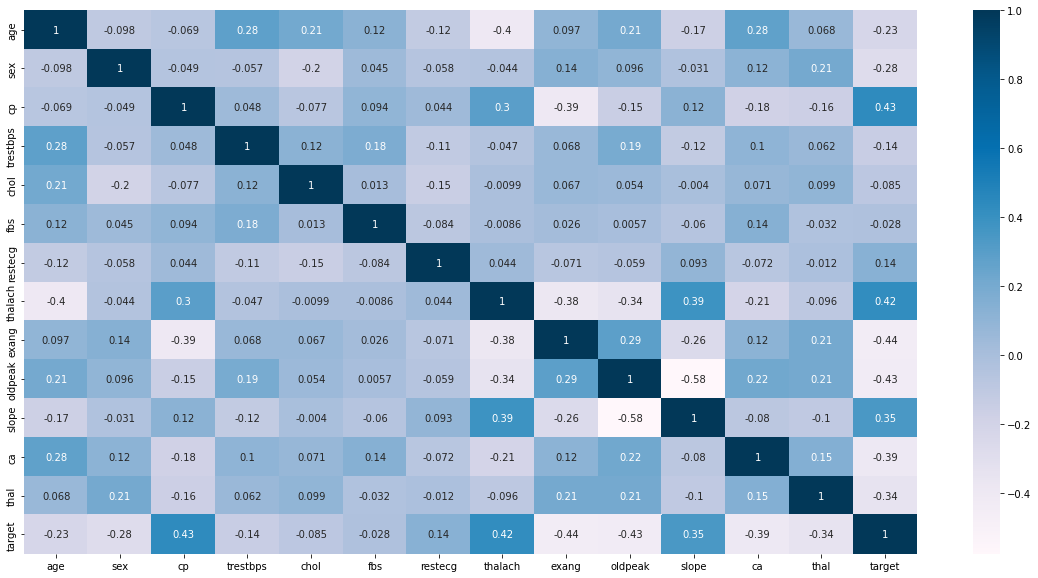

In [11]:
# Mapa de correlação das variáveis
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='PuBu')

In [12]:
# Reduzindo dimensionalidade para 2 dimensões com PCA para verificar separabilidade das classes da variável target
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df.drop(columns=['target']))
df_pca = pd.DataFrame(df_pca, columns=['V1', 'V2'])
df_pca['target'] = df['target']
df_pca.head()

,V1,V2,target
0,-12.267345,2.873838,1
1,2.690137,-39.871374,1
2,-42.950214,-23.636820,1
3,-10.944756,-28.438036,1
4,106.979053,-15.874468,1


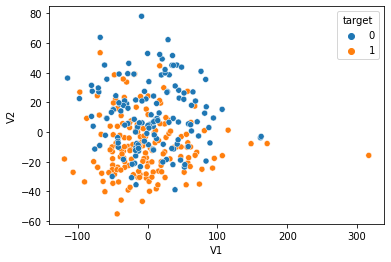

In [13]:
sns.scatterplot(x='V1', y='V2', hue='target', data=df_pca)

Observa-se que as classes são pouco separáveis, o que vai dificultar a classificação do algoritmo.

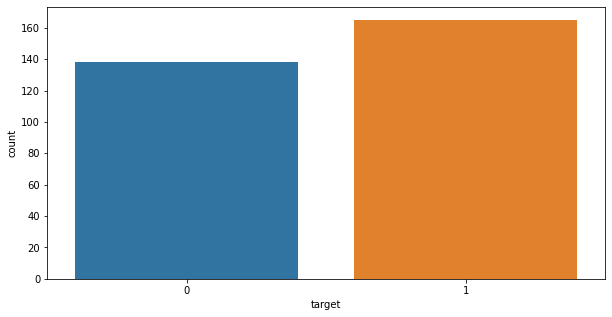

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='target',data=df)

Nota-se que temos um problema com classes razoavelmente balanceadas, o que facilita a generalização do modelo.

Text(0.5, 0, 'Ages')

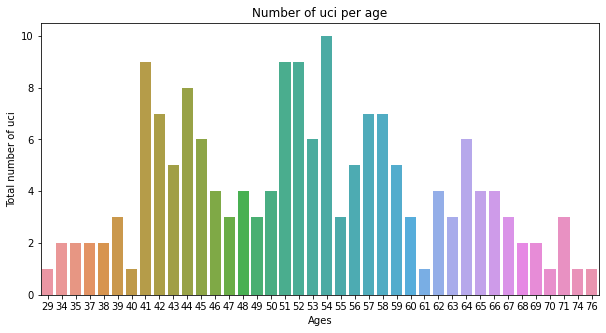

In [15]:
aux_graph = df[df['target'] == 1]
plt.figure(figsize=(10,5))
sns.countplot(x='age',data=aux_graph)
plt.title('Number of uci per age')
plt.ylabel('Total number of uci')
plt.xlabel('Ages')

Observa-se com o gráfico acima que as doenças coronárias são mais recorrentes a partir dos 40 anos.

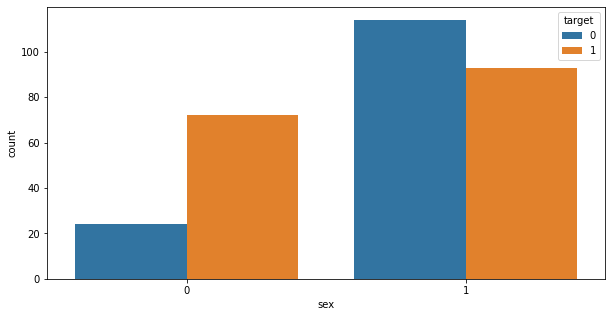

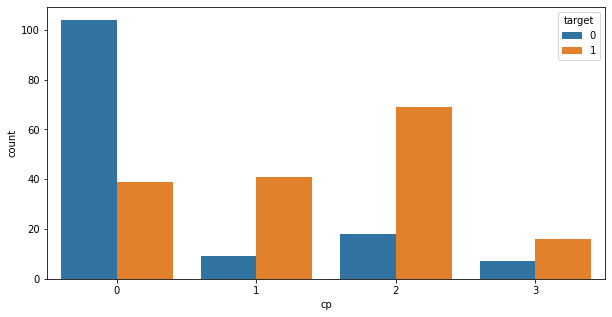

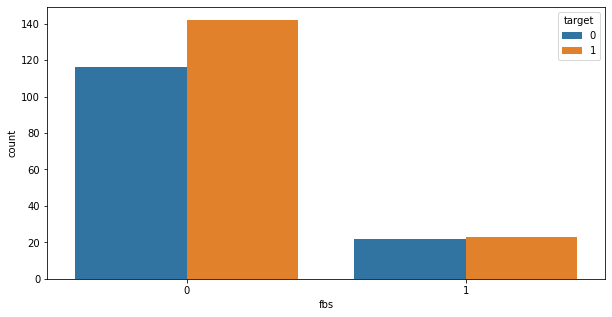

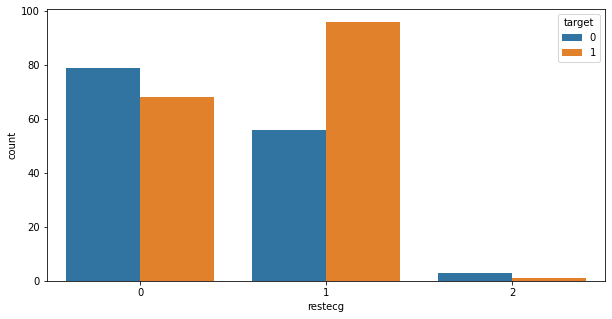

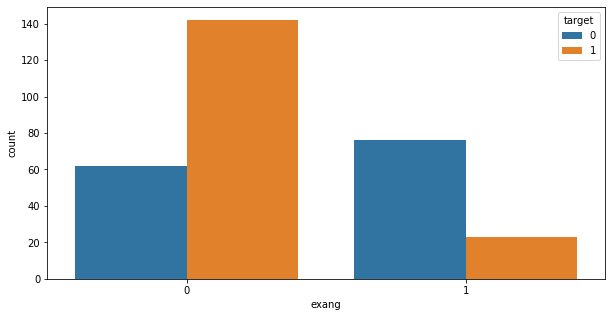

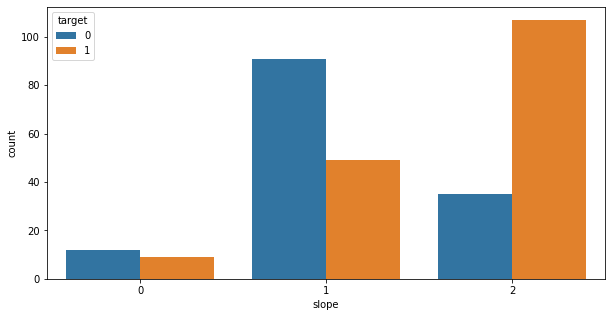

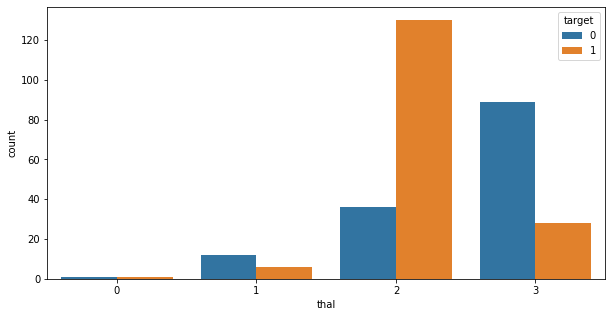

In [16]:
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, hue='target')
    plt.show()

Observa-se nos gráficos acimas que algumas variáveis tem uma boa ligação com a variável target, como cp, fps, restecg, exang, etc.

# 5. Tratamento dos dados

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Primeiramente, vamos tratar as variáveis categóricas, que são:
- cp
- restecg
- slope
- tal

In [18]:
# Tratando variáveis categóricas
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])

As demais variáveis já estão no padrão para serem utilizadas no modelo.

# 6. Modelagem

Para o presente problema de classificação, vamos usar os seguintes modelos:
- Logistic Regression
- Decision Tree
- Random Forest
- Xgboosting

## 6.1 Divisão treino/teste

In [19]:
#Valores das variáveis dependentes (X) e independentes (Y)
X = df.drop(columns=['target'])
Y = df[['target']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
results = {'Models' : ['LR', 'DT', 'RF', 'XGB'],
           'Acurracy' : [],
           'Precision' : [],
           'Recall' : [],
           'F1-score' : []
          }

## 6.2 Logistic Regression

In [22]:
clf = LogisticRegression().fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

## 6.3 Decision Tree

In [25]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

## 6.4 Random Forest

In [28]:
clf = RandomForestClassifier().fit(X_train, y_train)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

## 6.5 Xgboosting

In [31]:
clf = XGBClassifier().fit(X_train, y_train)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

# 7. Resultado parcial

In [34]:
pd.DataFrame(results).set_index('Models')

,Acurracy,Precision,Recall,F1-score
Models,,,,
LR,0.868852,0.928571,0.81250,0.866667
DT,0.852459,0.870968,0.84375,0.857143
RF,0.852459,0.870968,0.84375,0.857143
XGB,0.836066,0.866667,0.81250,0.838710


Para a classfificação das doenças coronárias, a melhor métrica a ser utilizada e o de Recall, que mede o quão robusto o modelo é para falsos negativos. Porém, como os modelos estão razoavelmente parecidos, vou levar em consideração a métrica F1-score, que leva em consideração os falsos negativos e falsos postivos. Logo, para a otimização dos hiperparãmetros vão ser ecolhido 2 modelos, o Logistic Regression e Random Forest.

# 8. Otimização dos modelos

In [48]:
#Criando função para otimização dos parâmetros
def otimizacao(clf, params):
  grid = GridSearchCV(clf, param_grid=params, scoring='recall', cv=5)
  grid.fit(X_train, y_train)
  return grid.best_estimator_

In [54]:
# Parâmetros a serem testados para Logistic Regression
parms_LR = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.001, 0.1, 1],
    'class_weight' : [None, 'balanced'],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'n_jobs' : [-1]
}

# Parâmetros a serem testados para Random Forest
params_RF = {
    'n_estimators' : [100, 120, 140, 160, 200],
    'max_depth' : [None, 5, 7, 10],
    'max_leaf_nodes' : [None, 5, 10, 30],
    'class_weight' : [None, 'balanced'],
    'criterion' : ['gini', 'entropy', 'log_Loss']
}

In [41]:
#Criando DataFrame para comparação das métricas
comparation = {'Models' : ['Logistic Regression', 'Random Forest'],
           'Accurracy' : [],
           'Precision' : [],
           'Recall' : [],
           'F1-score' : []
          }

In [50]:
#Logistic Regression
clf = otimizacao(LogisticRegression(random_state=42), params= parms_LR)
y_pred = clf.predict(X_test)
comparation['Accurracy'].append(accuracy_score(y_test, y_pred))
comparation['Precision'].append(precision_score(y_test, y_pred))
comparation['Recall'].append(precision_score(y_test, y_pred))
comparation['F1-score'].append(f1_score(y_test, y_pred))

In [55]:
#Random Forest
clf = otimizacao(RandomForestClassifier(random_state=42, n_jobs=-1), params= params_RF)
y_pred = clf.predict(X_test)
comparation['Accurracy'].append(accuracy_score(y_test, y_pred))
comparation['Precision'].append(precision_score(y_test, y_pred))
comparation['Recall'].append(precision_score(y_test, y_pred))
comparation['F1-score'].append(f1_score(y_test, y_pred))

# 9. Comparação dos modelos otimizados

In [56]:
pd.DataFrame(comparation)

,Models,Accurracy,Precision,Recall,F1-score
0,Logistic Regression,0.524590,0.524590,0.524590,0.688172
1,Random Forest,0.885246,0.878788,0.878788,0.892308


In [59]:
#Melhor modelo do Rnadom Forest
clf

RandomForestClassifier(criterion='entropy', max_leaf_nodes=5, n_estimators=160,
                       n_jobs=-1, random_state=42)

Observa-se que após a otimização dos parâmetros, temos uma piora no modelo de Regressão Logistica e uma melhora significativa no modelo Random Forest, sendo o modelo escolhido para o presente projeto

# 10. Matriz de confusão 

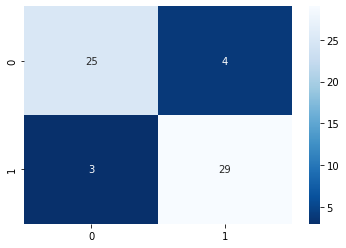

In [63]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues_r', annot=True)

# 11. Feature Importance

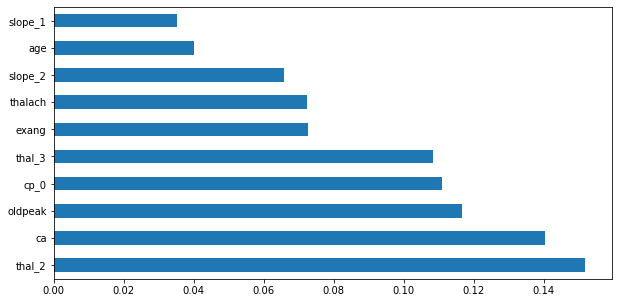

In [74]:
from IPython.core.pylabtools import figsize
feat_importance = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh', figsize=(10,5))

Observa-se acima que a variável mais importante para a predição das doenças coronárias é o thal_2, referente a defeito reversível
e a etiqueta, seguido de ca, que se refere ao número de vasos principais.

# 12. Visualizando árvore de decisões

In [105]:
Y= Y.astype(str)

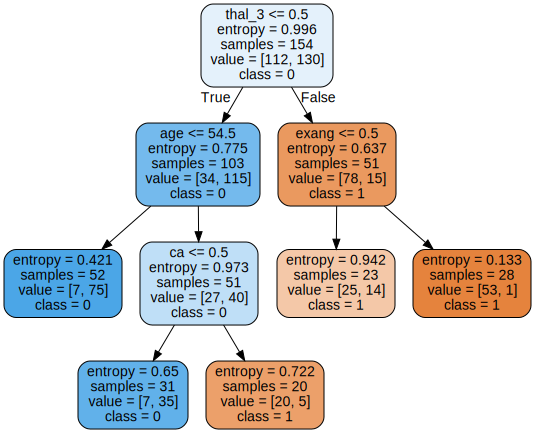

<Figure size 1440x1080 with 0 Axes>

In [127]:
#Plotando a última árvore do modelo Random Forest
fn= X.columns
cn= Y['target'].value_counts().index
plt.figure(figsize(20,15))
dot_data = tree.export_graphviz(clf.estimators_[159],
               feature_names = fn,
               class_names=cn,
               filled = True, impurity=True, 
                           rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph